# Project: Explore Weather Trends

## Table of Contents
<ul>
<li><a href="#lc">My Local City</a></li>
<li><a href="#Extracting">Extracting Data</a></li>
<li><a href="#exp">Exporting Data</a></li>
<li><a href="#tool">Used Tool</a></li>
<li><a href="#load">Loading Data</a></li>   
<li><a href="#Man">Manipulating Data</a></li>
<li><a href="#DV">Data Visualization</a></li>
<li><a href="#IDV">Interpreting Data Visualization</a></li>

</ul>

<a id='lc'></a>
## My Local City

> As I live in Istanbul city in Turkey, so I found that Istanbul’s yearly temperature data are registered in our database as a big city.

<a id='Extracting'></a>
## Extracting Data
> SQL statement is written in order to inquiry about the meant data, where I’ve planned to demonstrate both city level data and global data using the same SQL statement. The used SQL Statement is shown below

>`SELECT city, country, c.year, c.avg_temp local_temp, g.avg_temp global_temp
FROM city_data c, global_data g
WHERE c.year=g.year AND c.avg_temp IS NOT NULL AND city='Istanbul' AND country='Turkey'`

>Our SQL statement is a smart one, where we save a lot of work in cleaning the data with any other tool, in particular we noticed that some cities have missing past data so we’ve removed them here.

<a id='exp'></a>
## Exporting Data
>Output data are downloaded in CSV format named `global_local_weather.csv`.

<a id='tool'></a>
## Used Tool
>To prepare and visualize data, Jupyter Notebook is used to carry out that.

<a id='load'></a>
## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df=pd.read_csv('global_local_weather.csv')
print('The shape is ',df.shape)
df.head()

The shape is  (264, 5)


,city,country,year,local_temp,global_temp
0,Istanbul,Turkey,1750,13.83,8.72
1,Istanbul,Turkey,1751,14.14,7.98
2,Istanbul,Turkey,1752,9.48,5.78
3,Istanbul,Turkey,1753,13.42,8.39
4,Istanbul,Turkey,1754,13.58,8.47


In [3]:
df.nunique()

city             1
country          1
year           264
local_temp     155
global_temp    145
dtype: int64

In [4]:
df.isnull().sum()

city           0
country        0
year           0
local_temp     0
global_temp    0
dtype: int64

In [5]:
df.describe()

,year,local_temp,global_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,13.510189,8.359394
std,76.354437,0.699959,0.575184
min,1750.000000,9.480000,5.780000
25%,1815.750000,13.090000,8.077500
50%,1881.500000,13.480000,8.365000
75%,1947.250000,13.950000,8.700000
max,2013.000000,16.020000,9.730000


In [6]:
df=df.iloc[:,2:].set_index('year')
df.head(20)

,local_temp,global_temp
year,,
1750,13.83,8.72
1751,14.14,7.98
1752,9.48,5.78
1753,13.42,8.39
1754,13.58,8.47
1755,13.36,8.36
1756,14.10,8.85
1757,13.90,9.02
1758,12.10,6.74


<a id='Man'></a>
## Manipulating Data
>Last 10 years temperatures moving average are calculated locally and globally as below:

In [7]:
df['local_MA'] = df.local_temp.rolling(window=11).mean()

In [8]:
df['Global_MA'] = df.global_temp.rolling(window=11).mean()

In [9]:
df.head(20)

,local_temp,global_temp,local_MA,Global_MA
year,,,,
1750,13.83,8.72,NaN,NaN
1751,14.14,7.98,NaN,NaN
1752,9.48,5.78,NaN,NaN
1753,13.42,8.39,NaN,NaN
1754,13.58,8.47,NaN,NaN
1755,13.36,8.36,NaN,NaN
1756,14.10,8.85,NaN,NaN
1757,13.90,9.02,NaN,NaN
1758,12.10,6.74,NaN,NaN


In [10]:
df=df.dropna(0)
df.head()

,local_temp,global_temp,local_MA,Global_MA
year,,,,
1760,12.57,7.19,13.055455,7.953636
1761,13.76,8.77,13.049091,7.958182
1762,13.66,8.61,13.005455,8.015455
1763,12.72,7.50,13.300000,8.171818
1764,13.79,8.40,13.333636,8.172727


In [11]:
df.iloc[:,2:].idxmax(axis = 0)

local_MA     2013
Global_MA    2013
dtype: int64

In [12]:
df.iloc[:,2:].idxmin(axis = 0)

local_MA     1818
Global_MA    1819
dtype: int64

<a id='DV'></a>
## Data Visualization
>Line chart are designed for both local and global moving averages over years as below:

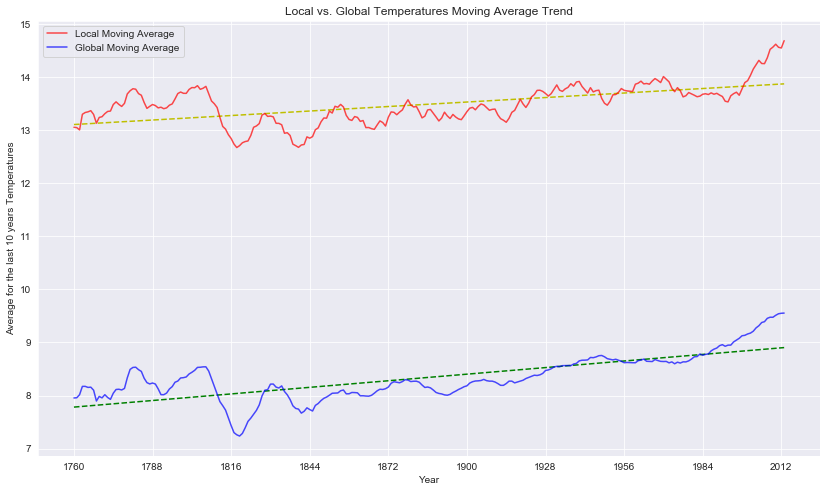

In [13]:
plt.figure(figsize=(14,8))


z = np.polyfit(df.index,df.Global_MA, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index),"r--",color='g')
z = np.polyfit(df.index,df.local_MA, 1)
p = np.poly1d(z)
plt.plot(df.index,p(df.index),"r--",color='y')

Local_MA= plt.plot(df.local_MA, color='r', alpha=.7, label='Local Moving Average')
Global_MA = plt.plot(df.Global_MA, color='b', alpha=.7, label='Global Moving Average')

plt.xlabel('Year')
plt.ylabel('Average for the last 10 years Temperatures')
plt.title('Local vs. Global Temperatures Moving Average Trend')
plt.legend()

plt.xticks(np.linspace(1760,2012,10));

<a id='IDV'></a>
## Interpreting Data Visualization
>We notice the following:

> 1-the local trend line is always above the global trend line and both lines don’t have any intersection, it means that the average temperatures for my local city is always greater than global ones which indicates that is Istanbul on average is hotter compared to global average.

> 2-Also, Istanbul has positive relationship with the global temperature, I mean that Istanbul temperature increases as well as global increases and visa versa.

> 3-Also, the global temperature has an increasing trend on overall, which indicates that the world is getting hotter by time.

> 4-Also, we observe that the minimum moving average in both local and global was happened within 10 years earlier to the year 1818 and 1819 respectively. But the maximum moving average in both local and global was happened within 10 years earlier to the year 2013.
